# PA005: High Value Customer Identification 

# 0.0. Planejamento da Solução (IOT) 

### Input - Entrada  

#### 1. Problema do negócio:
       -Selecionar os clientes mais valiosos para integrar um programa de fidelidade
#### 2. Conjunto de dados:
       -Vendas de um e-commerce online durante um ano

### Output - Saída 

1. A indicação das pessoas que farão parte do programa Insiders
    -Lista: client_id | is_insiders
        10323 | yes/1
        10654 | no/2
2. Relatório com as repostas das perguntas de negócio
        1 - Quem são as pessoas elegíveis para participar do programa de Insiders ?
        2 - Quantos clientes farão parte do grupo?
        3 - Quais as principais características desses clientes ?
        4 - Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
        5 - Qual a expectativa de faturamento desse grupo para os próximos meses ?
        6 - Quais as condições para uma pessoa ser elegível ao Insiders ?
        7 - Quais as condições para uma pessoa ser removida do Insiders ?
        8 - Qual a garantia que o programa Insiders é melhor que o restante da base ?
        9 - Quais ações o time de marketing pode realizar para aumentar o faturamento?

### Task - Tarefas 

1. Quem são as pessoas elegíveis para participar do programa de Insiders?
   - O que é ser elegível? O que são clientes de maior "valor"? 
   - Faturamento:
       - Alto ticket médio
       - Alto LTV
       - Baixo Recência
       - Alto Basket Size
       - Baixa Probabilidade de Churn
       - Alta Previsão LTV
       - Alta Propensão de Compras 
       
                
    - Custo:
       - Baixa taixa de devolução   
       
    - Experiência de compra:
       - Média alta das avaliações 
       
              
2. Quantos clientes farão parte do grupo?
     - Número total de tickets
     - % do grupo Insiders
          
3. Quais as principais características desses clientes? 
     - Escrever características do cliente:
       - Idade
       - Localização
     - Escrever características do consumo:
       - Atributos de Clusterização
    
4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders?
     - Faturamento total do ano
     - Faturamento do grupo Insiders
     
5. Qual a expectativa de faturamento desse grupo para os próximos meses?
      - LTV do grupo Insiders
      - Análise de Cohort

6. Quais as condições para uma pessoa ser elegível ao Insiders?
      - Definir a periodicidade (1 mês, 3 meses)
      - A pessoa ser similar ou parecido com uma pessoa do grupo
      
7. Quais as condições para uma pessoa ser removida do Insiders?
      - Definir a periodicidade (1 mês, 3 meses)
      - A pessoa ser dissimilar ou não-parecido com uma pessoa do grupo
      
8. Qual a garantia que o programa Insiders é melhor que o restante da base?
      - Teste A/B
      - Teste A/B Bayesiano
      - Teste de Hipóteses
      

9. Quais ações o time de marketing pode realizar para aumentar o faturamento?
      - Desconto
      - Preferência de compra
      - Frete
      - Visita a empresa
     

# <font color=red> 0.0. Imports <font/>

In [1]:
import pandas     as pd
import numpy      as np
import seaborn    as sns
import sklearn
import umap.umap_ as umap

from sklearn             import cluster  as c
from sklearn             import metrics  as m
from plotly              import express  as px
from matplotlib          import pyplot   as plt
from plotly              import express  as px
from IPython.display     import HTML
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


## 0.1. Helper Functions 

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = [24,9]
    plt.rcParams['font.size'] = 24
                     
    display(HTML('<style>.container {widht:100% !important;}</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
                     
    sns.set()
jupyter_settings()
                                      
                                     
                     
                     
                     
                     

Populating the interactive namespace from numpy and matplotlib


## 0.2. Load Dataset 

In [3]:
df_raw = pd.read_csv('C:/Users/Michelle/repos/pa005_insiders_clustering/pa005_insiders_clustering/insiders_clustering/data/raw/Ecommerce.csv')

#drop columns NaN
df_raw = df_raw.drop(columns=['Unnamed: 8'], axis=1)
df_raw.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


# <font color=red> 1.0. Descrição dos Dados <font/>

## 1.1. Rename Columns

In [4]:
df1 = df_raw.copy()

In [5]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
cols_new = ['invoice_no','stock_code','description', 'quantity', 'invoice_date', 'unit_price', 'customer_id', 'country']
df1.columns=cols_new
df1.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')

In [7]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


## 1.2. Data Dimensions

In [8]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of cols: {}'.format(df1.shape[1]))

Number of rows: 541909
Number of cols: 8


## 1.3. Data Types

In [9]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 1.4. Check NA

In [10]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.5. Replace NA

In [11]:
df1=df1.dropna(subset = ['description', 'customer_id'])
print('Removed data: {:.2f}'.format(1 - ( df1.shape[0] / df_raw.shape[0] )))


Removed data: 0.25


In [12]:
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## 1.6. Change dtypes

In [13]:
#invoice date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')

#customer id
df1['customer_id'] = df1['customer_id'].astype(int64)
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [14]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

## 1.7. Descriptive Statistics

# <font color=red> 2.0. Feature Engineering <font/>

In [15]:
df2 = df1.copy()


## 2.1. Feature Creation

In [16]:
# data reference
df_ref = df2.drop( ['invoice_no', 'stock_code', 'description', 
                    'quantity', 'invoice_date', 'unit_price', 
                    'country'], axis=1 ).drop_duplicates( ignore_index=True )

# Gross Revenue ( Faturamento ) quantity * price
df2['gross_revenue'] = df2['quantity'] * df2['unit_price']

# Monetary
df_monetary = df2[['customer_id', 'gross_revenue']].groupby( 'customer_id' ).sum().reset_index()
df_ref = pd.merge( df_ref, df_monetary, on='customer_id', how='left' )

# Recency - Last day purchase
df_recency = df2[['customer_id', 'invoice_date']].groupby( 'customer_id' ).max().reset_index()
df_recency['recency_days'] = ( df2['invoice_date'].max() - df_recency['invoice_date'] ).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left' )

# Frequency
df_freq = df2[['customer_id', 'invoice_no']].drop_duplicates().groupby( 'customer_id' ).count().reset_index()
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )
df_ref.head()

#Avg Ticket 
df_avg_ticket = df2[['customer_id', 'gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue':'avg_ticket'})
df_ref = pd.merge(df_ref,df_avg_ticket,on='customer_id', how='left')
df_ref.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket
0,17850,5288.63,302,35,16.950737
1,13047,3079.10,31,18,15.709694
2,12583,7187.34,2,18,28.634821
3,13748,948.25,95,5,33.866071
4,15100,635.10,330,6,105.850000


# <font color=red> 3.0. Variable Filtering <font/>

In [17]:
df3=df_ref.copy()

# <font color=red> 4.0. Exploratory Data Analysis <font/>

In [18]:
df4=df3.copy()

# <font color=red> 5.0. Data Preparation <font/>

In [19]:
df5=df4.copy()

# <font color=red> 6.0. Feature Selection <font/>

In [20]:
df6=df5.copy()

# <font color=red> 7.0. Hiperparameter Fine-Tuning  <font/>

In [21]:
X = df6.drop( columns=['customer_id'] )

In [22]:
X.head()

,gross_revenue,recency_days,invoice_no,avg_ticket
0,5288.63,302,35,16.950737
1,3079.10,31,18,15.709694
2,7187.34,2,18,28.634821
3,948.25,95,5,33.866071
4,635.10,330,6,105.850000


In [23]:
clusters=[2,3,4,5,6,7]

## 7.1. Within-Cluster Sum of Square (WSS)

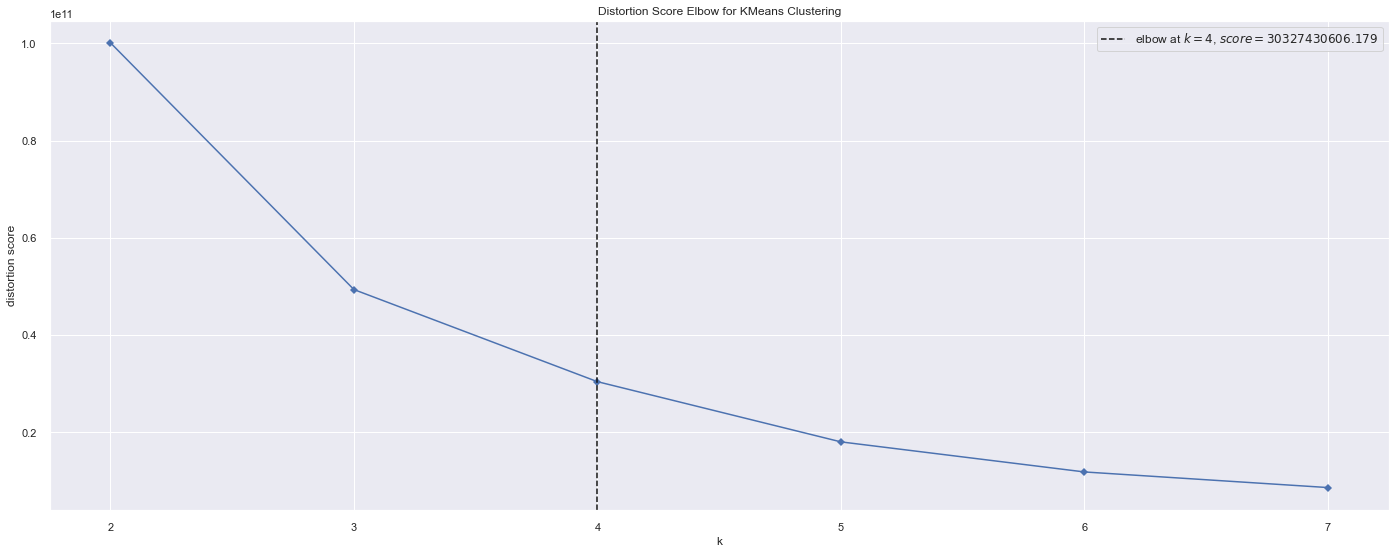

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KElbowVisualizer( c.KMeans(), k=clusters, timings=False )
kmeans.fit( X )
kmeans.show()

## 7.2. Silhouette Score

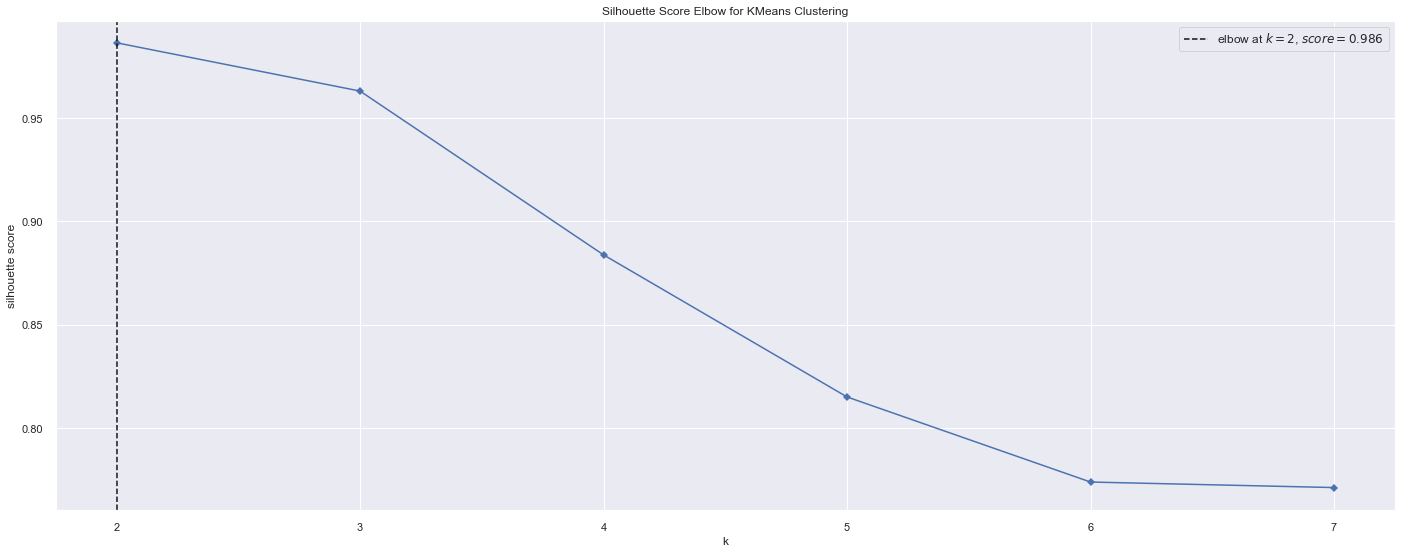

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [48]:
kmeans = KElbowVisualizer( c.KMeans(), k=clusters, metric='silhouette', timings=False )
kmeans.fit( X )
kmeans.show()


## 7.3. Silhouette Analysis

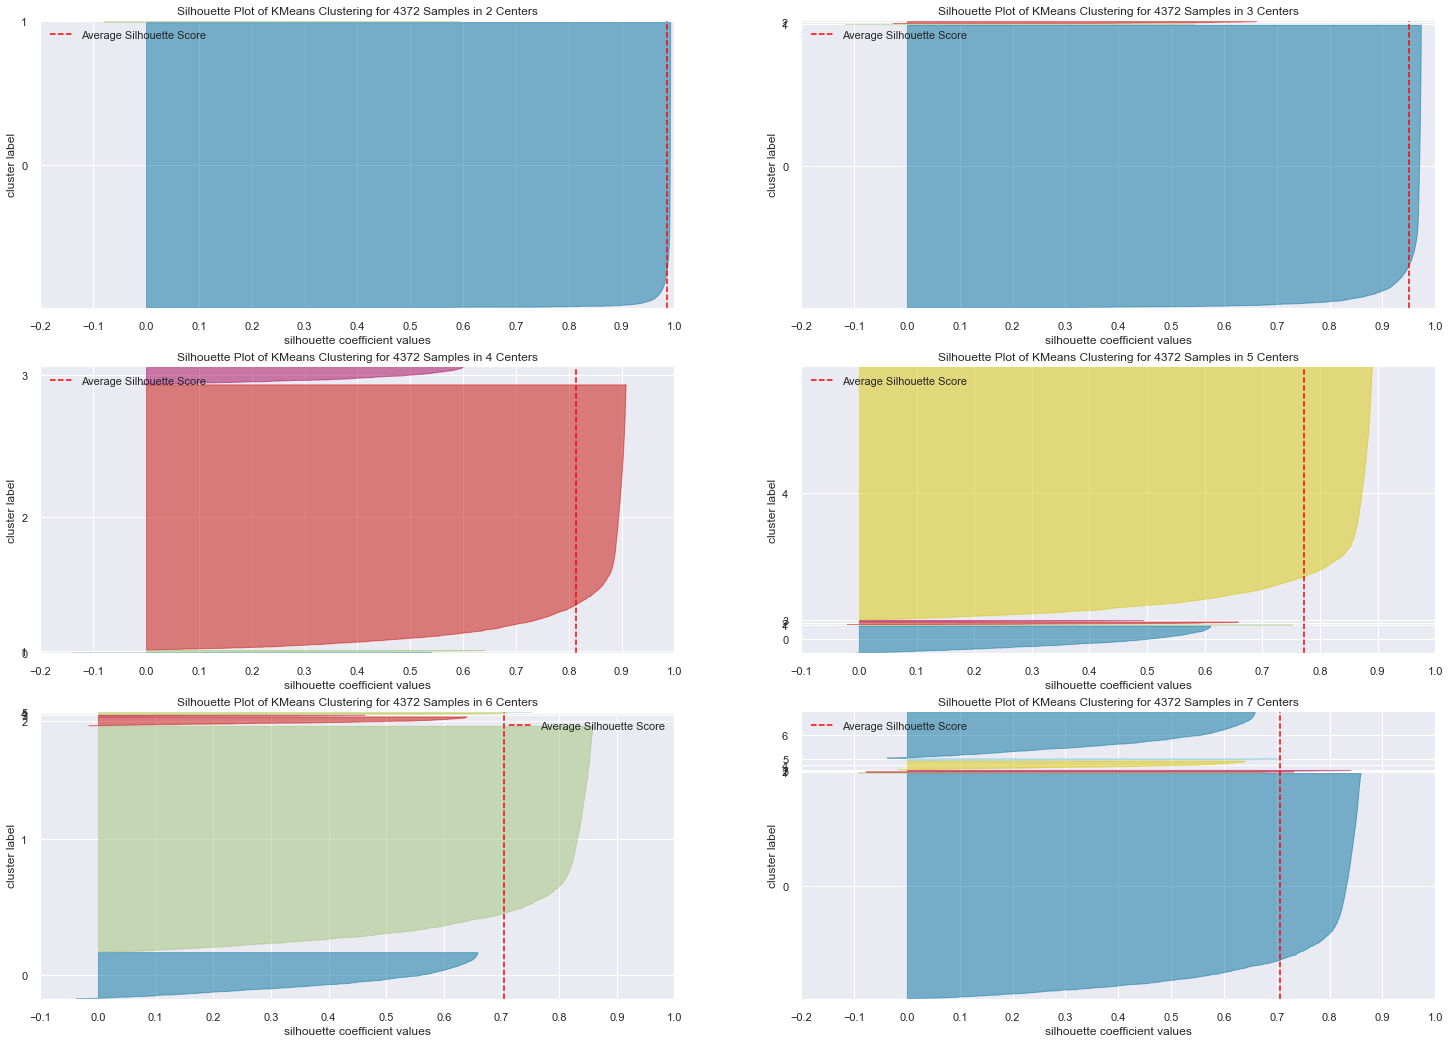

In [49]:
fig, ax = plt.subplots( 3, 2, figsize=(25, 18) )

for k in clusters:
    km = c.KMeans( n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42 )
    q, mod = divmod( k, 2 )
    
    visualizer = SilhouetteVisualizer( km, colors='yellowbrick', ax=ax[q-1][mod] )
    visualizer.fit( X )
    visualizer.finalize()

# <font color=red> 8.0. Model Training <font/>

## 8.1. K-Means

In [24]:
# model definition
k = 4
kmeans = c.KMeans( init='random', n_clusters=k, n_init=10, max_iter=300 )

# model training
kmeans.fit( X )

# clustering
labels = kmeans.labels_

## 8.2.Cluster Validation

In [53]:
## WSS ( Within-cluster sum of square)
print( 'WSS value: {}'.format( kmeans.inertia_ ) )

## SS ( Silhouette Score )
print( 'SS value: {}'.format( m.silhouette_score( X, labels, metric='euclidean' ) ) )

WSS value: 40056254626.30002
SS value: 0.8139972028952442


# <font color=red> 9.0. Cluster Analysis <font/>

In [25]:
df9 = df6.copy()
df9['cluster'] = labels
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,cluster
0,17850,5288.63,302,35,16.950737,2
1,13047,3079.10,31,18,15.709694,3
2,12583,7187.34,2,18,28.634821,2
3,13748,948.25,95,5,33.866071,3
4,15100,635.10,330,6,105.850000,3


## 9.1.Visualization Inspection

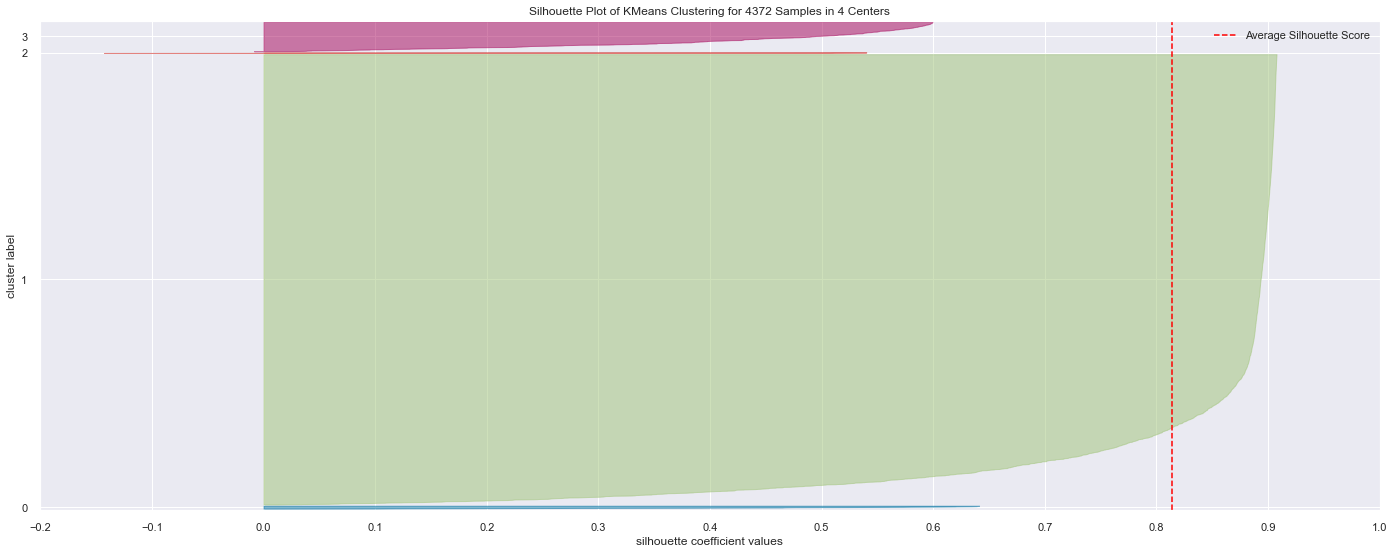

In [62]:
visualizer = SilhouetteVisualizer( kmeans, colors='yellowbrick' )
visualizer.fit( X )
visualizer.finalize()

## 9.2. 2d plot

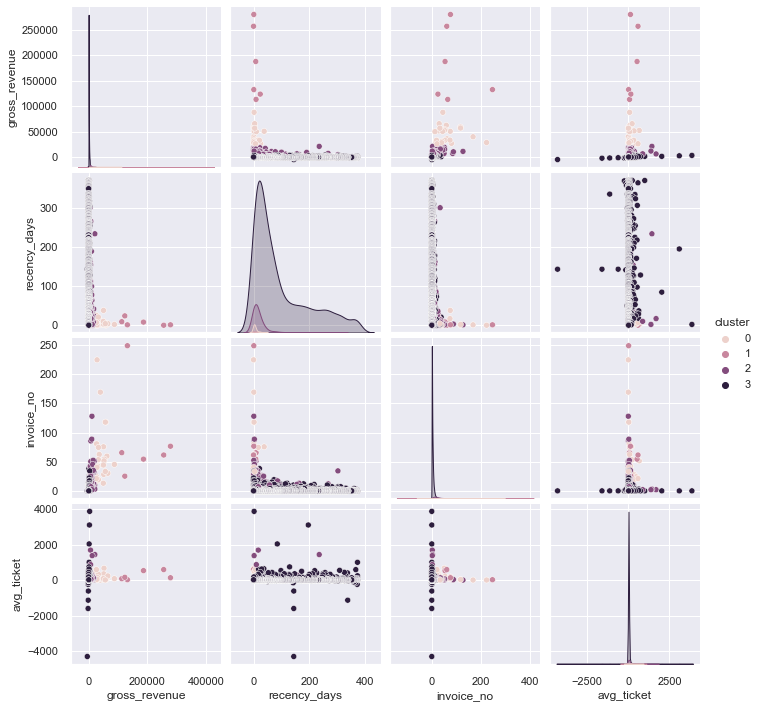

In [29]:
df_viz = df9.drop( columns='customer_id', axis=1 )
sns.pairplot( df_viz, hue='cluster' )

## 9.3.UMAP

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

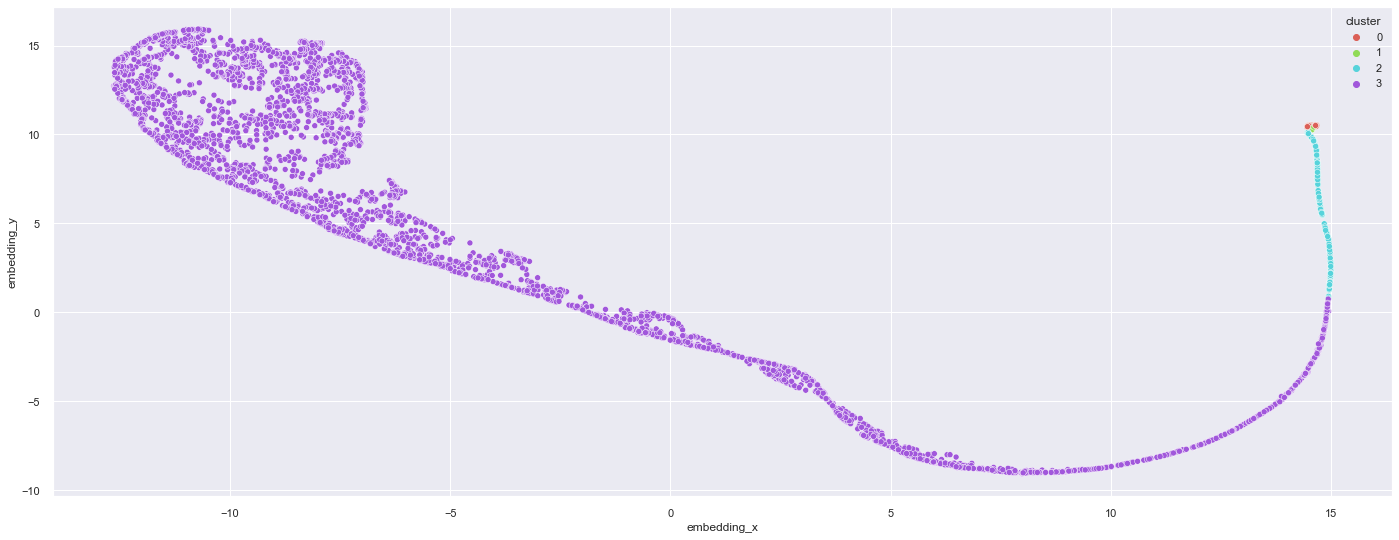

In [32]:
reducer = umap.UMAP( n_neighbors=80, random_state=42 )
embedding = reducer.fit_transform( X )

# embedding
df_viz['embedding_x'] = embedding[:, 0]
df_viz['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot( x='embedding_x', y='embedding_y', 
                 hue='cluster', 
                 palette=sns.color_palette( 'hls', n_colors=len( df_viz['cluster'].unique() ) ),
                 data=df_viz )

## 9.4.Cluster Profile

In [26]:
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,cluster
0,17850,5288.63,302,35,16.950737,2
1,13047,3079.10,31,18,15.709694,3
2,12583,7187.34,2,18,28.634821,2
3,13748,948.25,95,5,33.866071,3
4,15100,635.10,330,6,105.850000,3


In [33]:
#Number of customer
df_cluster = df9[['customer_id','cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = 100*(df_cluster['customer_id']/df_cluster['customer_id'].sum())

#Average Gross Revenue
df_avg_gross_revenue = df9[['gross_revenue','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster,df_avg_gross_revenue, how='inner', on='cluster')

#Average recency_days
df_avg_recency_days = df9[['recency_days','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster,df_avg_recency_days, how='inner', on='cluster')

#Average invoice_no
df_avg_invoice_no = df9[['invoice_no','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_invoice_no, how='inner', on='cluster')

# Avg Ticket
df_ticket = df9[['avg_ticket', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_ticket, how='inner', on='cluster' )

df_cluster.head()


,cluster,customer_id,perc_customer,gross_revenue,recency_days,invoice_no,avg_ticket
0,0,28,0.640439,42614.387143,6.178571,57.821429,162.862605
1,1,6,0.137237,182181.981667,7.166667,89.000000,253.626345
2,2,267,6.107045,8089.028652,20.280899,19.528090,62.783157
3,3,4071,93.115279,946.696250,96.969295,3.641120,25.359654


### Cluster 01: Candidato a Insider

- Número de customers: 6 (0.14% do customers )
- Recência em média: 7 dias
- Compras em média: 89 compras
- Receita em média: $182.182,00 dólares

### Cluster 02: 

- Número de customers: 31 (0.71% do customers )
- Recência em média: 14 dias
- Compras em média: 53 compras
- Receita em média: $40.543,52 dólares

### Cluster 03: 

- Número de customers: 4.335 (99% do customers )
- Recência em média: 92 dias
- Compras em média: 5 compras
- Receita em média: $1.372,57 dólares